<a href="https://colab.research.google.com/github/dourivaljunior/Curso-de-Data-Science/blob/main/problema_previsao_emprestimo_1a_parte_tratamento_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1a PARTE: TRATAMENTO DOS DADOS.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/dourivaljunior/arquivos/main/loan_data.csv')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df=df.drop(['Loan_ID'],axis=1)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Dependents'] =df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
print('LoanAmount','média=', int(round(df['LoanAmount'].mean(),0)),'desvio padrão=',int(round(df['LoanAmount'].std(),0)),
      'mediana=',int(round(df['LoanAmount'].median(),0)),'moda=',int(round(df['LoanAmount'].mode(),0)))

LoanAmount média= 146 desvio padrão= 86 mediana= 128 moda= 120


In [ ]:
print('Loan_Amount_Term',int(round(df['Loan_Amount_Term'].mean(),0)),int(round(df['Loan_Amount_Term'].std(),0)),
      int(round(df['Loan_Amount_Term'].median(),0)),int(round(df['Loan_Amount_Term'].mode(),0)))

Loan_Amount_Term 342 65 360 360


In [ ]:
print('CoapplicantIncome',int(round(df['CoapplicantIncome'].mean(),0)),int(round(df['CoapplicantIncome'].std(),0)),
      int(round(df['CoapplicantIncome'].median(),0)),int(round(df['CoapplicantIncome'].mode(),0)))

CoapplicantIncome 1621 2926 1188 0


In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [ ]:
df=df.drop(['CoapplicantIncome'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    float64
 1   Married           614 non-null    float64
 2   Dependents        614 non-null    float64
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    float64
 5   ApplicantIncome   614 non-null    int64  
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    int64  
 10  Loan_Status       614 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 52.9 KB


In [ ]:
import matplotlib.pyplot as plt

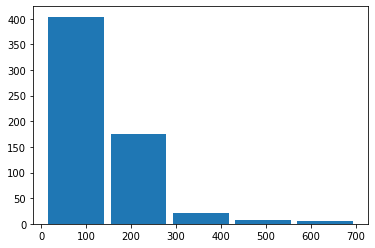

In [ ]:
plt.hist(df['LoanAmount'],5,rwidth=0.9)
plt.show()

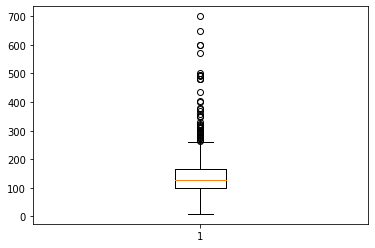

In [ ]:
plt.boxplot(df['LoanAmount'])
plt.show()

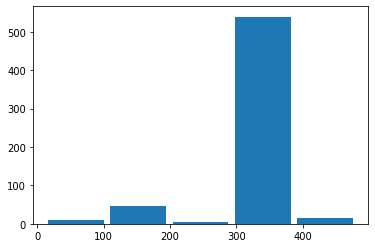

In [ ]:
plt.hist(df['Loan_Amount_Term'],5, rwidth=0.9)
plt.show()

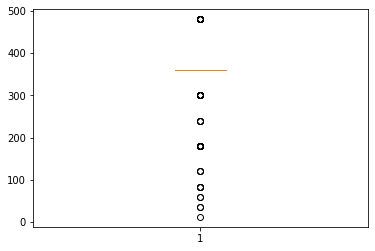

In [ ]:
plt.boxplot(df['Loan_Amount_Term'])
plt.show()

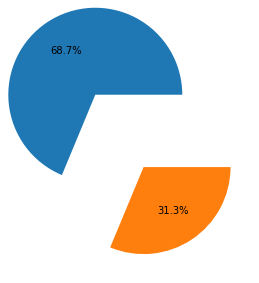

In [ ]:
labels=df['Loan_Status'].value_counts().index
percentagens=(df['Loan_Status'].value_counts())
plt.pie(percentagens,labels,autopct='%2.1f%%')
plt.show()

In [ ]:
# saving the pre-processed data
from google.colab import files 
df.to_csv('dados_processados_previsao_emprestimo.csv', index=False)
files.download('dados_processados_previsao_emprestimo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>